## Features

- Informative Features.
- Independent Features (low correlation between them).
- No large amount of Features.

In [17]:
import pandas as pd
X = pd.read_csv('Notebooks_Platzi_ML/machine-learning-platz-master/datasets/intermediate_results/X.csv')
Y = X['worldwide_gross']
X = X.drop(columns='worldwide_gross')

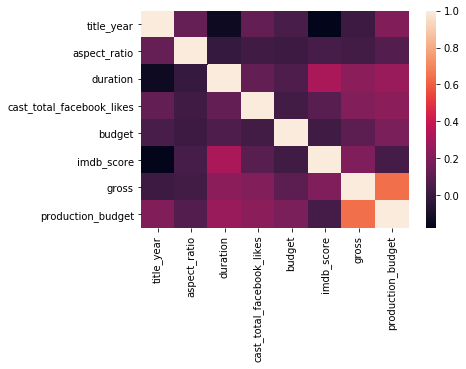

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(X.corr())

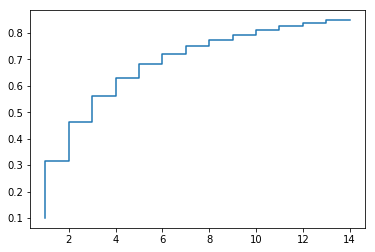

In [19]:
x = np.arange(1,15)
y = np.power(0.1,1/x)
plt.step(x,y)

In [20]:
from sklearn.linear_model import Lasso

model = Lasso()

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y) # by default: 75% Train set and 25% Test set.

model.fit(X_train, Y_train) # Fit the model

model.score(X_test, Y_test) # Evaluate the test set

/Users/Jhon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.8704151995562255

In [23]:
model.coef_ # Show the coefficients of polinomic equation

array([ 8.20894248e+05, -3.47369164e+06, -8.74954811e+03, -1.46124411e+02,
       -3.30894266e-02,  9.90432712e+06,  1.87947795e+00,  1.19941920e+00])

#### To show what are the variables (features) that have more importance (more weight):

([<matplotlib.axis.XTick at 0x1a1793e748>,
 <a list of 7 Text xticklabel objects>)

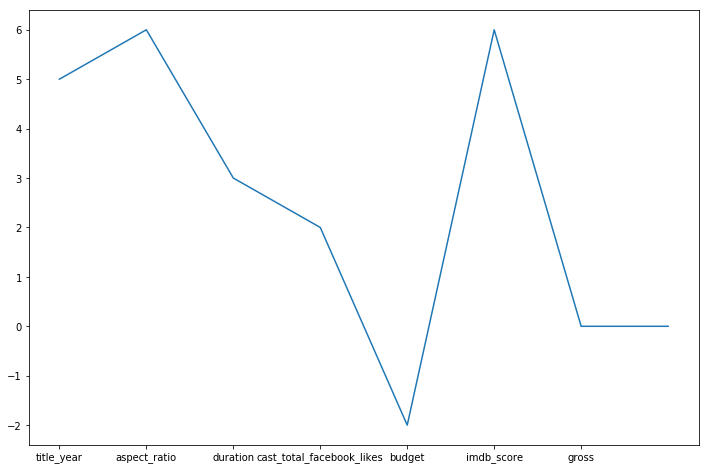

In [26]:
var = np.floor(np.log10(np.abs(model.coef_)))
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(var)
plt.xticks(np.arange(7),list(X.columns))

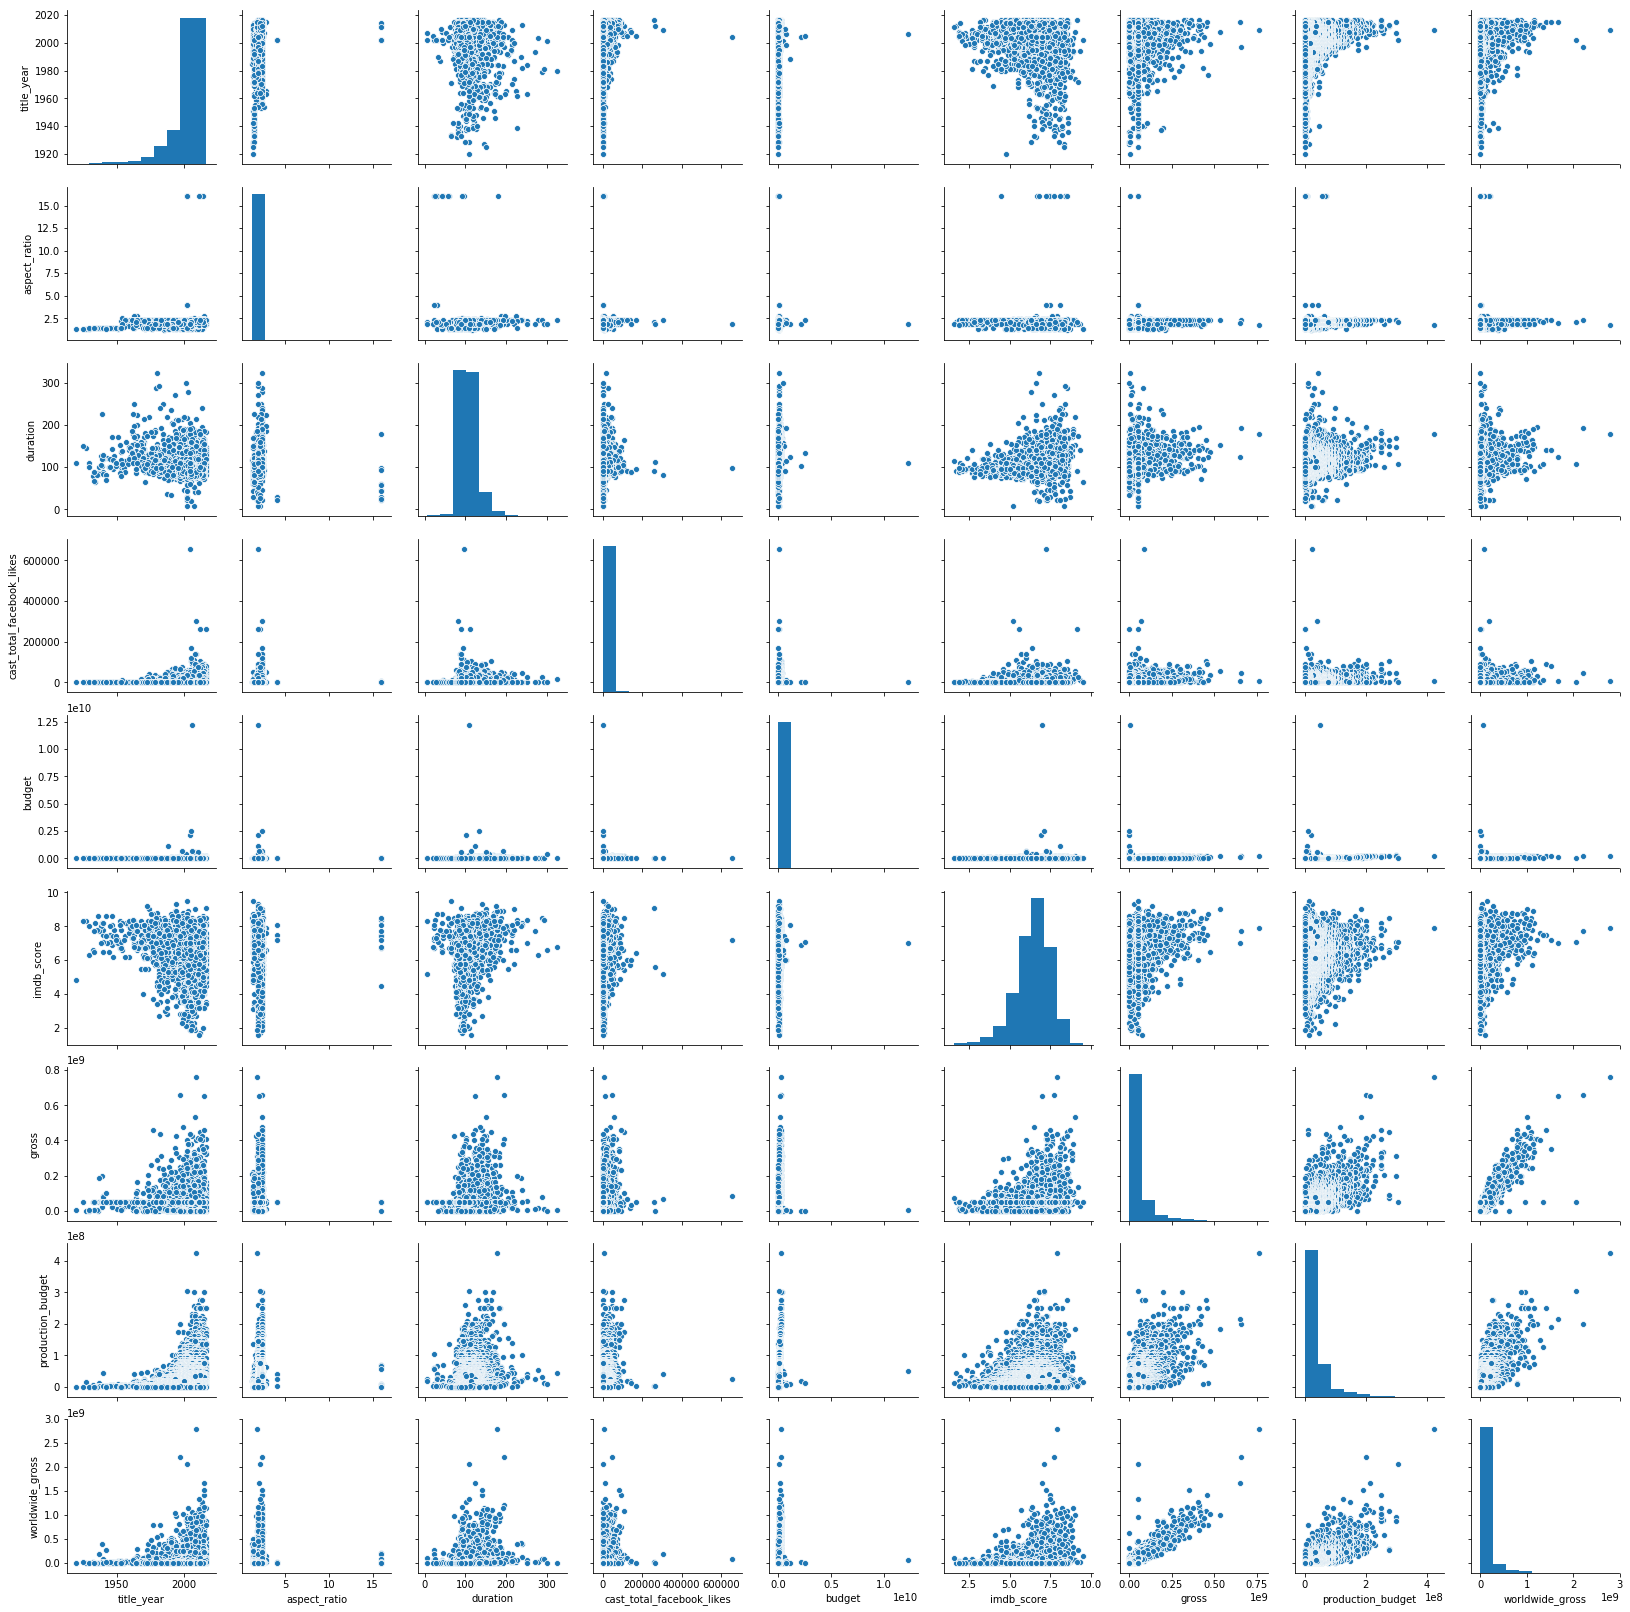

In [28]:
Z = pd.concat([X,Y],axis=1)
sns.pairplot(Z)

In [33]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
z2 = pd.concat([X,clase],axis=1)

# cut is used to cut the data set in n segments. In this case is 8
# cat.codes is used to assign each data interval to any category

/Users/Jhon/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Jhon/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Jhon/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Jhon/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


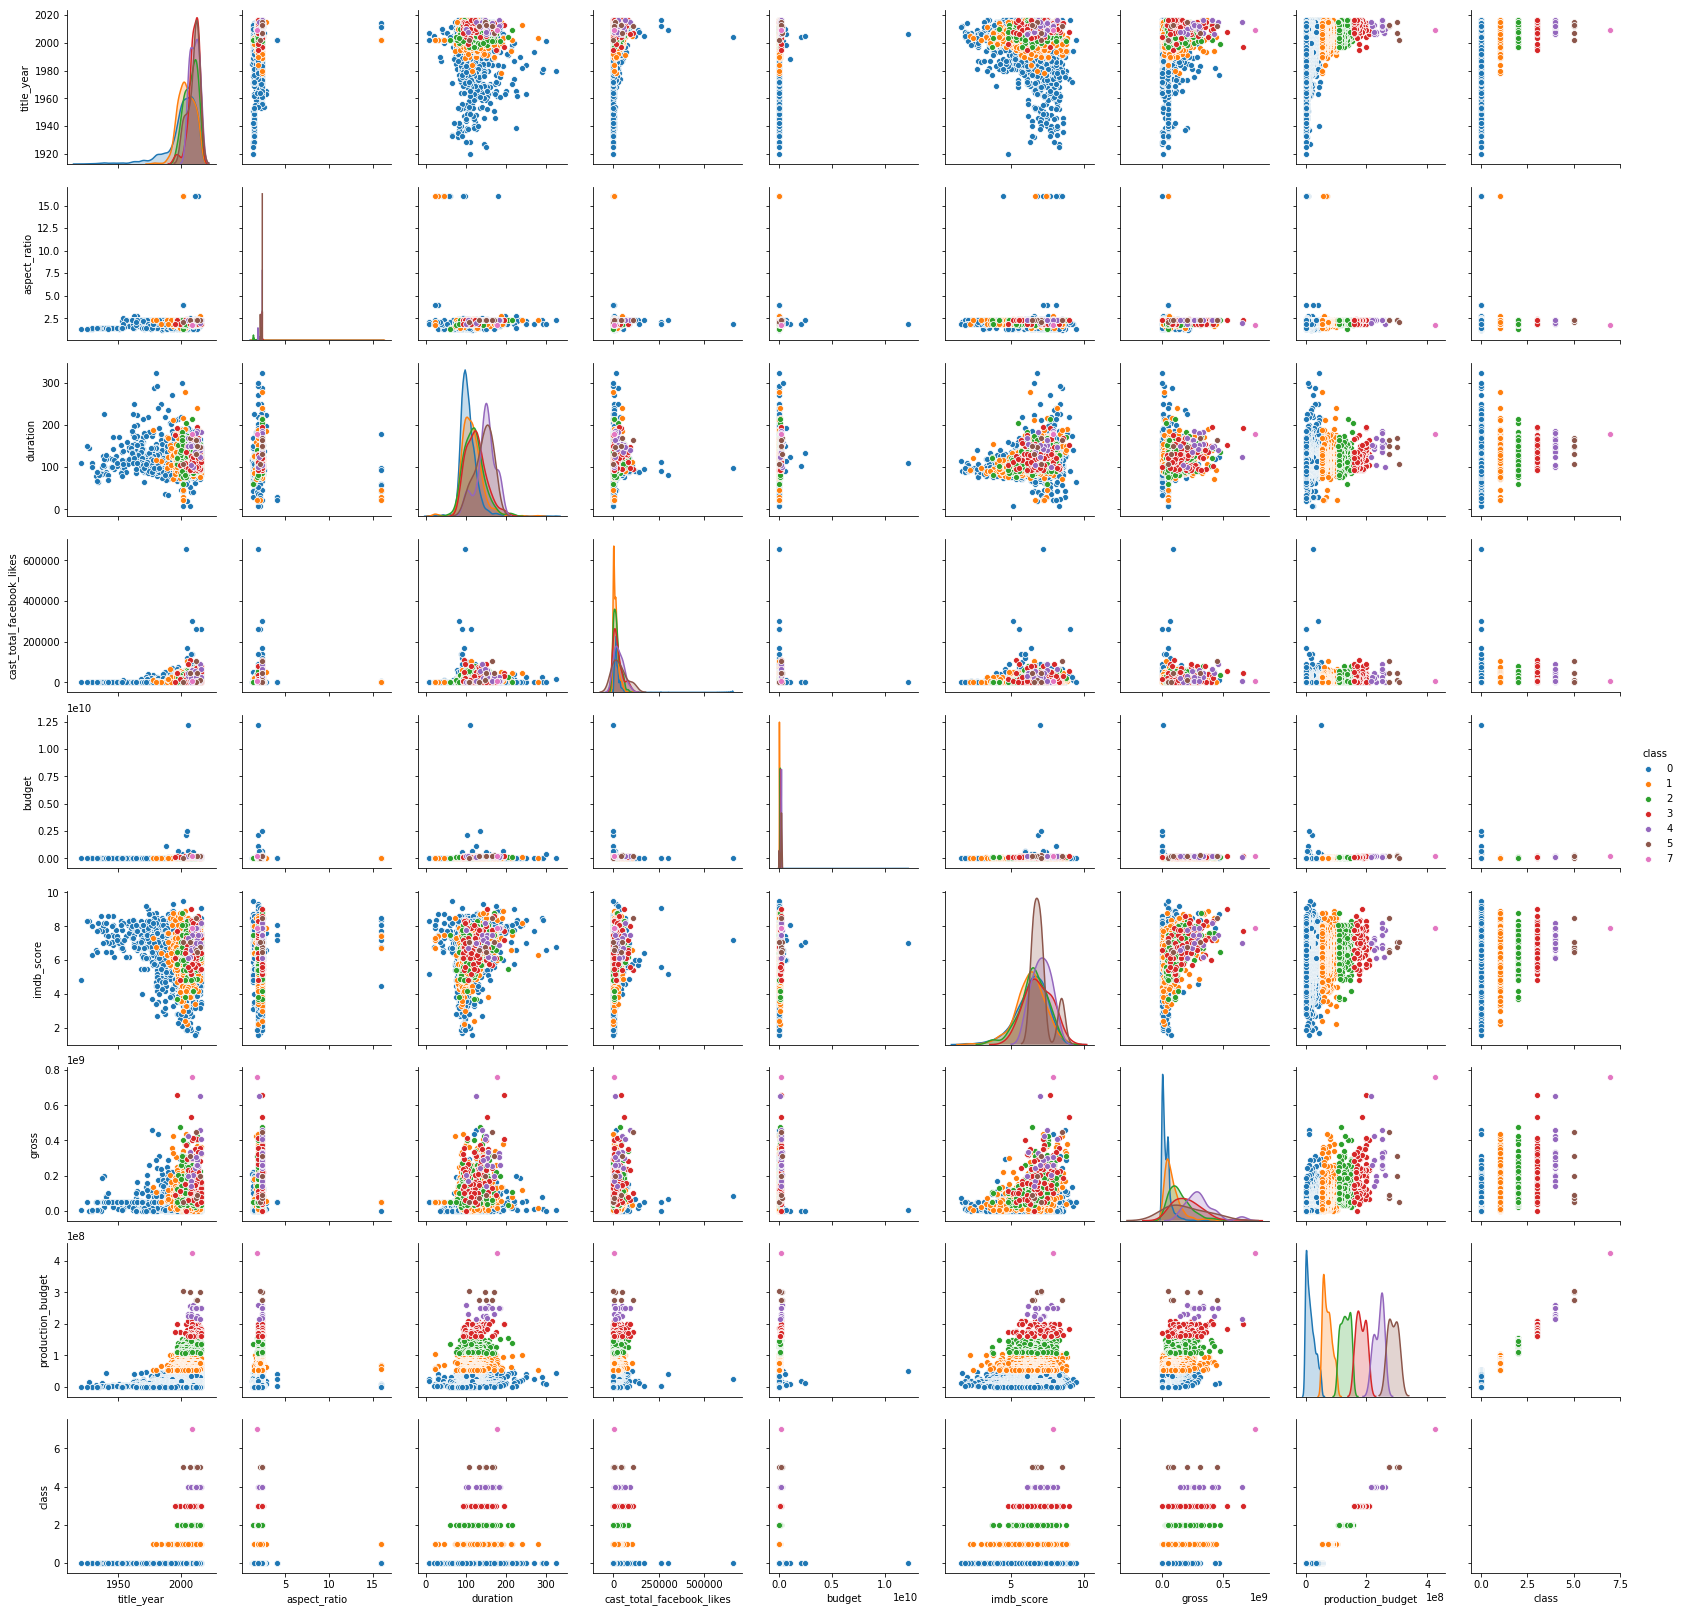

In [34]:
sns.pairplot(z2,hue='class')

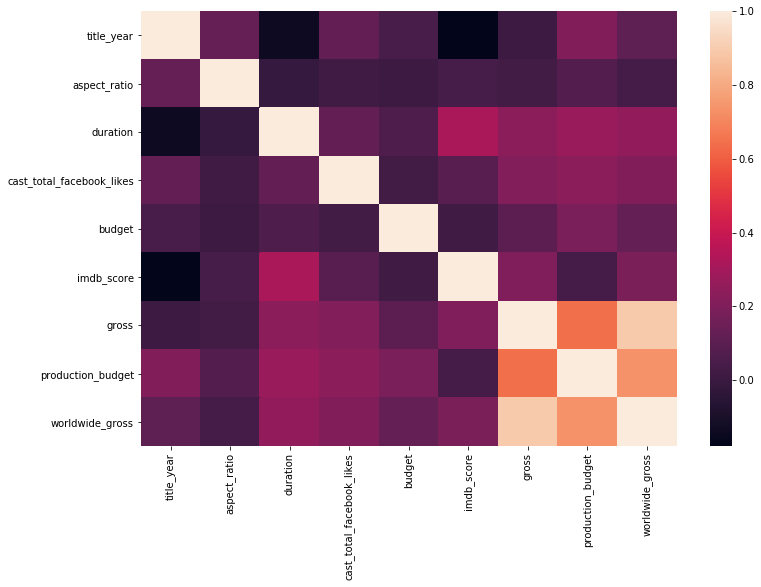

In [35]:
Z3 = pd.concat([X,Y],axis=1)
sns.heatmap(Z3.corr())

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4) # Univariate analysis
selector.fit(X,Y)

SelectKBest(k=4, score_func=<function mutual_info_regression at 0x1a1766b598>)

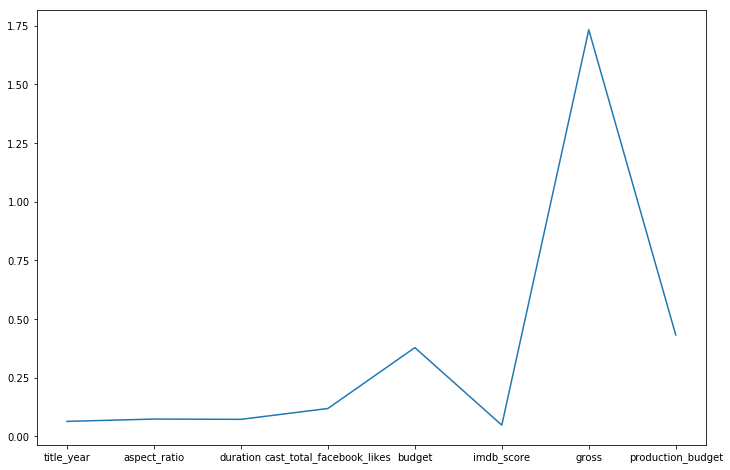

In [41]:
scores = selector.scores_
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(8),list(X.columns));

### Based on that information We can reduce the model features (dimensions).

We will test with 5 dimensions an 3 dimensions:

In [ ]:
X2 = X[['production_budget','title_year','duration','cast_total_facebook_likes','imdb_score']]
X3 = X[['production_budget','cast_total_facebook_likes','imdb_score']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

cols2 = ['production_budget','title_year','duration','cast_total_facebook_likes','imdb_score']
cols3 = []'production_budget','cast_total_facebook_likes','imdb_score']